In [ ]:
#Tensorflow / Pytorch

In [1]:
import pandas as pd

datos = pd.read_csv("celsius.csv")

In [2]:
datos.head()

,celsius,fahrenheit
0,-40,-40.0
1,-10,14.0
2,0,32.0
3,8,46.4
4,15,59.0


In [3]:
datos["celsius"].values

array([-40, -10,   0,   8,  15,  22,  38])

In [1]:
%pip install tensorflow_hub

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.7 MB 656.4 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.7 MB 901.1 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.7 MB 1.3 MB/s eta 0:00:02
   -------- ------------------------------- 0.4/1.7 MB 1.6 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.7 MB 2.4 MB/s eta 0:00:01
   --------------------- ------------------ 0.9/1.7 MB 2.9 MB/s eta 0:00:01
   ------------------------------------- -- 1.6/1.7 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Carolina\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
X = datos["celsius"].values
y = datos["fahrenheit"].values

In [5]:
import tensorflow as tf

modelo = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)), #la entrada, los celsius: 1 solo dato
    tf.keras.layers.Dense(units=1), #la salida. Tambien es un dato: Los grados fahrenheit
])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(.1),
    loss="mean_squared_error"
)

In [6]:
entrenamiento = modelo.fit(X, y, epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - loss: 6339.4028
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 5989.7998
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 5651.9229
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 5325.9639
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5012.0938
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 4710.4570
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 4421.1729
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4144.3364
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 3880.0117
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3628.2336
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 3389.0015
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3162.2854
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2948.0193
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 2746.1033
Epoch 15/1000
1/1 ━━━━━━━━━━

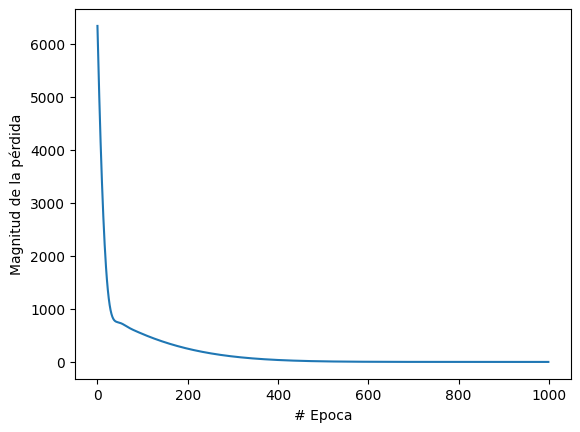

In [7]:
import matplotlib.pyplot as plt

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de la pérdida")
plt.plot(entrenamiento.history["loss"])

In [11]:
import numpy as np

c = 1230
prediccion = modelo.predict(np.array([[c]]))
print(f"Predicción: {c} celsius son {prediccion[0]} fahrenheit")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicción: 1230 celsius son [2246.4434] fahrenheit


In [12]:
print(modelo.layers[0].get_weights())

[array([[1.8003979]], dtype=float32), array([31.953938], dtype=float32)]


: 

In [ ]:
#Calculo real para convertir celsius a fahrenheit es
# (C * 1.8) + 32

In [ ]:
#Backpropagation / Propagación hacia atrás.